[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W6/W6P3.ipynb)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
import statsmodels
from statsmodels.tsa import stattools

In [3]:
def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
  !unzip "/content/ch2data.zip" -d "/content/ch2data/"
  if not os.getcwd() == '/content/ch2data':
    os.chdir("ch2data")
  else:
    print(f"Current directory is now {os.getcwd()}")


def to_dataframe(text: str):
    """
    
    Parameters
    ----------
    text : this dude is a text file (a string actually).

    Returns
    -------
    Pandas dataframe

    """    
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)      
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)
    
    L = L.apply(pd.to_numeric)
    L.columns = headers
    return L

In [4]:
download_data()
os.listdir()   ### make sure that you are at the right

--2022-11-18 12:50:27--  https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
Resolving faculty.chicagobooth.edu (faculty.chicagobooth.edu)... 128.135.211.142
Connecting to faculty.chicagobooth.edu (faculty.chicagobooth.edu)|128.135.211.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 557379 (544K) [application/x-zip-compressed]
Saving to: ‘ch2data.zip’

ch2data.zip         100%[===================>] 544.32K   258KB/s    in 2.1s    

2022-11-18 12:50:30 (258 KB/s) - ‘ch2data.zip’ saved [557379/557379]

Archive:  /content/ch2data.zip
  inflating: /content/ch2data/d-aapl0305.txt  
  inflating: /content/ch2data/d-ibm3dx7008.txt  
  inflating: /content/ch2data/d-sp55008.txt  
  inflating: /content/ch2data/d-vix0810.txt  
  inflating: /content/ch2data/m-3m4608.txt  
  inflating: /content/ch2data/m-aaa-1911.txt  
  inflating: /content/ch2data/m-baa-1911.txt  
  inflating: /content/ch2data/m-dec125910-6111.txt  
  inflating: /c

['d-sp55008.txt',
 'm-aaa-1911.txt',
 'q-gnp4710.txt',
 'q-GNPC96.txt',
 'd-vix0810.txt',
 'w-tb3ms.txt',
 'w-tb6ms.txt',
 'm-deciles08.txt',
 'q-gdp4708.txt',
 'w-gs1yr.txt',
 'w-gs3yr.txt',
 'm-ibm3dx2608.txt',
 'm-3m4608.txt',
 'm-ibmsp6709.txt',
 'd-aapl0305.txt',
 'm-dec125910-6111.txt',
 'm-unrate-4811.txt',
 'm-ibm3dx2609.txt',
 'm-dec12910.txt',
 'q-ko-earns8309.txt',
 'q-jnj-earns-9211.txt',
 'q-gdpc96.txt',
 'd-ibm3dx7008.txt',
 'm-baa-1911.txt']

In [5]:
data = to_dataframe("d-vix0810.txt")["Close"]

In [6]:
data

0      18.88
1      18.18
2      18.90
3      18.21
4      19.73
       ...  
491    16.20
492    15.59
493    15.89
494    18.36
495    17.34
Name: Close, Length: 496, dtype: float64

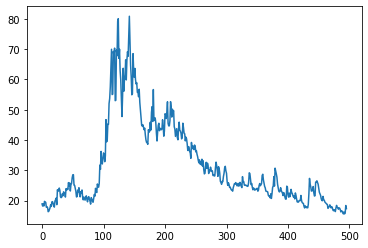

In [7]:
plt.plot(data)

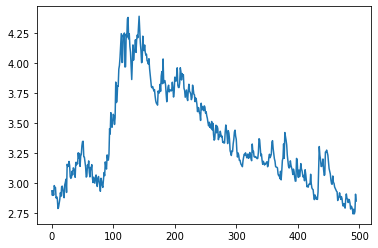

In [8]:
data_ = data.apply(np.log)
plt.plot(data_)

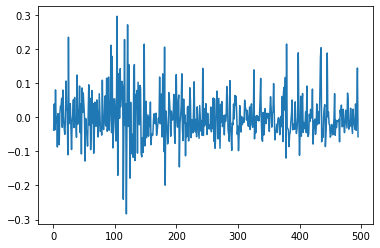

In [9]:
data_dif = data_.diff()[1:]
plt.plot(data_dif)

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

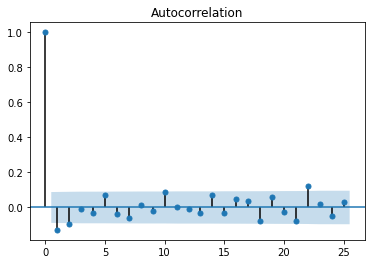

In [11]:
plot_acf(data_dif, lags = 25);

In [12]:
from statsmodels.tsa.arima.model import  ARIMA

In [13]:
model = ARIMA(data_dif, order = (0,0,1))    ### we can use exponential smoothing now 
res = model.fit()

In [14]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  495
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 638.972
Date:                Fri, 18 Nov 2022   AIC                          -1271.944
Time:                        12:50:33   BIC                          -1259.330
Sample:                             0   HQIC                         -1266.992
                                - 495                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.003     -0.057      0.955      -0.005       0.005
ma.L1         -0.1629      0.039     -4.151      0.000      -0.240      -0.086
sigma2         0.0044      0.000     22.162      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               207.42
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [27]:
statsmodels.stats.diagnostic.acorr_ljungbox(res.resid, return_df = True, model_df = 1)                                   

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/diagnostic.py:533: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)


,lb_stat,lb_pvalue
1,0.133720,NaN
2,4.622419,0.031557
3,5.102015,0.078003
4,5.489987,0.139239
5,7.282721,0.121681
6,8.019693,0.155154
7,10.114271,0.119922
8,10.116033,0.182093
9,10.119252,0.256756
10,14.247346,0.113795


In [17]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [18]:
mod = ExponentialSmoothing(data_)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [19]:
res = mod.fit()

In [20]:
res.summary()

Dep. Variable:,Close,No. Observations:,496
Model:,ExponentialSmoothing,SSE,2.192
Optimized:,True,AIC,-2685.137
Trend:,None,BIC,-2676.724
Seasonal:,None,AICC,-2685.056
Seasonal Periods:,None,Date:,"Fri, 18 Nov 2022"
Box-Cox:,False,Time:,12:50:33
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8367084,alpha,True
initial_level,2.9328591,l.0,True


In [29]:
res.forecast(10)

496    2.858437
497    2.858437
498    2.858437
499    2.858437
500    2.858437
501    2.858437
502    2.858437
503    2.858437
504    2.858437
505    2.858437
dtype: float64